In [1]:
## Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import *
from sklearn.preprocessing import MinMaxScaler
import sklearn.metrics as metrics

# Data Understanding

In [2]:
# Read the csv file
telco = pd.read_csv('Telco-Customer.csv')
telco.columns= telco.columns.str.lower()
df = telco

In [3]:
df.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   seniorcitizen     7043 non-null   int64  
 3   partner           7043 non-null   object 
 4   dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   phoneservice      7043 non-null   object 
 7   multiplelines     7043 non-null   object 
 8   internetservice   7043 non-null   object 
 9   onlinesecurity    7043 non-null   object 
 10  onlinebackup      7043 non-null   object 
 11  deviceprotection  7043 non-null   object 
 12  techsupport       7043 non-null   object 
 13  streamingtv       7043 non-null   object 
 14  streamingmovies   7043 non-null   object 
 15  contract          7043 non-null   object 
 16  paperlessbilling  7043 non-null   object 


### Data Dictionary
##### customerid  = Customer ID
##### gender = Whether the customer is a male or a female
##### seniorcitizen =  Whether the customer is a senior citizen or not (1, 0)
##### partner = Whether the customer has a partner or not (Yes, No)
##### dependents = Whether the customer has dependents or not (Yes, No)
##### tenure = Number of months that customer has stayed with the company
##### phoneservice = Whether the customer has a phone service or not (Yes, No)
##### multiplelines = Whether the customer has multiple lines or not (Yes, No, No phone service)
##### internetservice = Customer's internet service provider (DSL, Fiber optic, No)
##### online security = Whether the customer has online security or not (Yes, No, No internet service)
##### onlinebackup = Whether the customer has online backup or not (Yes, No, No internet service)
##### deviceprotection = Whether the customer has device protection or not (Yes, No, No internet service)
##### techsupport = Whether the customer has tech support or not (Yes, No, No internet service)
##### streamingtv = Whether the customer has streaming TV or not (Yes, No, No internet service) 
##### streamingmovies = Whether the customer has streaming movies or not (Yes, No, No internet service)
##### contract = The contract term of the customer (Month-to-month, One year, Two year)
##### paperlesbilling = Whether the customer has e-billing or not (Yes, No)
##### paymentmethod = The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
##### montlycharges = The amount charged to the customer monthly
##### totalcharges = The total amount charged to the customer
##### Churn = Whether the customer churned or not (Yes or No). A churned customer is a customer who has stopped subscribe to our telco.

# Data Preprocessing

In [5]:
# Wrong datatype for totalcharges. Convert to numerical data type, invalid parsing will be set as NaN.
df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')

# Check if null values exist
df.isnull().sum()

customerid           0
gender               0
seniorcitizen        0
partner              0
dependents           0
tenure               0
phoneservice         0
multiplelines        0
internetservice      0
onlinesecurity       0
onlinebackup         0
deviceprotection     0
techsupport          0
streamingtv          0
streamingmovies      0
contract             0
paperlessbilling     0
paymentmethod        0
monthlycharges       0
totalcharges        11
churn                0
dtype: int64

In [6]:
#Removing missing values since the data loss in small due to 11 records only out of 7043
df.dropna(inplace = True)

In [7]:
# drop customerid because it is meaningless
df = df.drop('customerid', axis=1)

In [8]:
# Convert seniorcitizen column (nominal data) from (1,0) to (Yes,No)
# Preparation for one-hot encoding for nominal data later
df['seniorcitizen'] = df['seniorcitizen'].apply(lambda x: 'No' if x == 0 else 'Yes')

In [9]:
# Take the rest of the columns beside categorical data except customer ID which is meaningless
numerical_data = df[['tenure','monthlycharges','totalcharges']]

# Churn convert from (Yes, No) to (1,0). Machine only understands numerical values
# Opposite opperation compared to seniorcitizen
df['churn'] = df['churn'].apply(lambda x: 0 if x == 'No' else 1)

In [10]:
# Idenfity the columns with nominal data (avoid using 1 or 0 on nominal data (e.g. gender) to avoid low accuracy)
# Perform one hot encoding on nominal data 
# Also known as dummy variable encoding since it creates one binary variable for each category.
one_hotted = pd.get_dummies(df)

In [11]:
# Normalization for numerical data type
# To avoid biases towards particular feature
features = one_hotted.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(one_hotted)
one_hotted = pd.DataFrame(scaler.transform(one_hotted))
one_hotted.columns = features

In [12]:
one_hotted.head()

,tenure,monthlycharges,totalcharges,churn,gender_Female,gender_Male,seniorcitizen_No,seniorcitizen_Yes,partner_No,partner_Yes,...,streamingmovies_Yes,contract_Month-to-month,contract_One year,contract_Two year,paperlessbilling_No,paperlessbilling_Yes,paymentmethod_Bank transfer (automatic),paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check
0,0.000000,0.115423,0.001275,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.464789,0.385075,0.215867,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.014085,0.354229,0.010310,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.619718,0.239303,0.210241,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.014085,0.521891,0.015330,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [13]:
# Check for outliers in numerical data
tenure_array = numerical_data['tenure'].to_numpy()
monthlycharges_array = numerical_data['monthlycharges'].to_numpy()
totalcharges_array = numerical_data['totalcharges'].to_numpy()

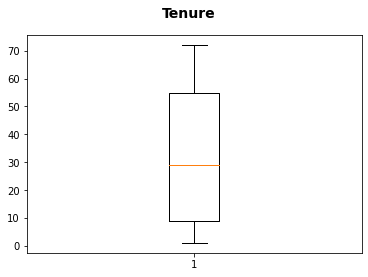

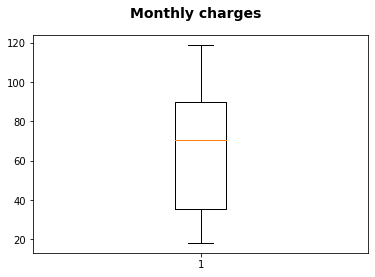

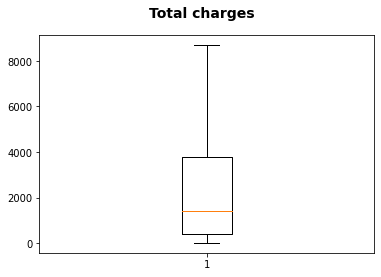

In [14]:
# Plot boxplot to determine outliers
# No outlier detected
fig = plt.figure()
fig.suptitle('Tenure', fontsize=14, fontweight='bold')
ax = fig.add_subplot(111)
ax.boxplot(tenure_array)
plt.show()

fig = plt.figure()
fig.suptitle('Monthly charges', fontsize=14, fontweight='bold')
ax = fig.add_subplot(111)
ax.boxplot(monthlycharges_array)
plt.show()

fig = plt.figure()
fig.suptitle('Total charges', fontsize=14, fontweight='bold')
ax = fig.add_subplot(111)
ax.boxplot(totalcharges_array)
plt.show()

In [15]:
# Check the correlation of churn with other attributes
corr = one_hotted.corr()
corr.style.background_gradient(cmap='coolwarm')

,tenure,monthlycharges,totalcharges,churn,gender_Female,gender_Male,seniorcitizen_No,seniorcitizen_Yes,partner_No,partner_Yes,dependents_No,dependents_Yes,phoneservice_No,phoneservice_Yes,multiplelines_No,multiplelines_No phone service,multiplelines_Yes,internetservice_DSL,internetservice_Fiber optic,internetservice_No,onlinesecurity_No,onlinesecurity_No internet service,onlinesecurity_Yes,onlinebackup_No,onlinebackup_No internet service,onlinebackup_Yes,deviceprotection_No,deviceprotection_No internet service,deviceprotection_Yes,techsupport_No,techsupport_No internet service,techsupport_Yes,streamingtv_No,streamingtv_No internet service,streamingtv_Yes,streamingmovies_No,streamingmovies_No internet service,streamingmovies_Yes,contract_Month-to-month,contract_One year,contract_Two year,paperlessbilling_No,paperlessbilling_Yes,paymentmethod_Bank transfer (automatic),paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check
tenure,1.000000,0.246862,0.825880,-0.354049,-0.005285,0.005285,-0.015683,0.015683,-0.381912,0.381912,-0.163386,0.163386,-0.007877,0.007877,-0.323891,-0.007877,0.332399,0.013786,0.017930,-0.037529,-0.265987,-0.037529,0.328297,-0.314769,-0.037529,0.361138,-0.314820,-0.037529,0.361520,-0.264363,-0.037529,0.325288,-0.246814,-0.037529,0.280264,-0.252890,-0.037529,0.285402,-0.649346,0.202338,0.563801,-0.004823,0.004823,0.243822,0.232800,-0.210197,-0.232181
monthlycharges,0.246862,1.000000,0.651065,0.192858,0.013779,-0.013779,-0.219874,0.219874,-0.097825,0.097825,0.112343,-0.112343,-0.248033,0.248033,-0.338514,-0.248033,0.490912,-0.161368,0.787195,-0.763191,0.360220,-0.763191,0.296447,0.210126,-0.763191,0.441529,0.171057,-0.763191,0.482607,0.321267,-0.763191,0.338301,0.016015,-0.763191,0.629668,0.017271,-0.763191,0.627235,0.058933,0.004810,-0.073256,-0.351930,0.351930,0.042410,0.030055,0.271117,-0.376568
totalcharges,0.825880,0.651065,1.000000,-0.199484,-0.000048,0.000048,-0.102411,0.102411,-0.319072,0.319072,-0.064653,0.064653,-0.113008,0.113008,-0.396765,-0.113008,0.469042,-0.052190,0.360769,-0.374878,-0.064515,-0.374878,0.412619,-0.177633,-0.374878,0.510100,-0.189485,-0.374878,0.522881,-0.084270,-0.374878,0.432868,-0.197144,-0.374878,0.515709,-0.202605,-0.374878,0.519867,-0.446776,0.170569,0.358036,-0.157830,0.157830,0.186119,0.182663,-0.060436,-0.294708
churn,-0.354049,0.192858,-0.199484,1.000000,0.008545,-0.008545,-0.150541,0.150541,0.149982,-0.149982,0.163128,-0.163128,-0.011691,0.011691,-0.032654,-0.011691,0.040033,-0.124141,0.307463,-0.227578,0.342235,-0.227578,-0.171270,0.267595,-0.227578,-0.082307,0.252056,-0.227578,-0.066193,0.336877,-0.227578,-0.164716,0.128435,-0.227578,0.063254,0.130920,-0.227578,0.060860,0.404565,-0.178225,-0.301552,-0.191454,0.191454,-0.118136,-0.134687,0.301455,-0.090773
gender_Female,-0.005285,0.013779,-0.000048,0.008545,1.000000,-1.000000,-0.001819,0.001819,-0.001379,0.001379,0.010349,-0.010349,-0.007515,0.007515,-0.004335,-0.007515,0.008883,-0.007584,0.011189,-0.004745,-0.010859,-0.004745,0.016328,-0.008605,-0.004745,0.013093,0.003163,-0.004745,0.000807,-0.003815,-0.004745,0.008507,-0.003088,-0.004745,0.007124,-0.006078,-0.004745,0.010105,0.003251,-0.007755,0.003603,-0.011902,0.011902,0.015973,-0.001632,-0.000844,-0.013199
gender_Male,0.005285,-0.013779,0.000048,-0.008545,-1.000000,1.000000,0.001819,-0.001819,0.001379,-0.001379,-0.010349,0.010349,0.007515,-0.007515,0.004335,0.007515,-0.008883,0.007584,-0.011189,0.004745,0.010859,0.004745,-0.016328,0.008605,0.004745,-0.013093,-0.003163,0.004745,-0.000807,0.003815,0.004745,-0.008507,0.003088,0.004745,-0.007124,0.006078,0.004745,-0.010105,-0.003251,0.007755,-0.003603,0.011902,-0.011902,-0.015973,0.001632,0.000844,0.013199
seniorcitizen_No,-0.015683,-0.219874,-0.102411,-0.150541,-0.001819,0.001819,1.000000,-1.000000,0.016957,-0.016957,-0.210550,0.210550,0.008392,-0.008392,0.136377,0.008392,-0.142996,0.108276,-0.254923,0.182519,-0.185145,0.182519,0.038576,-0.087539,0.182519,-0.066663,-0.094403,0.

<AxesSubplot:>

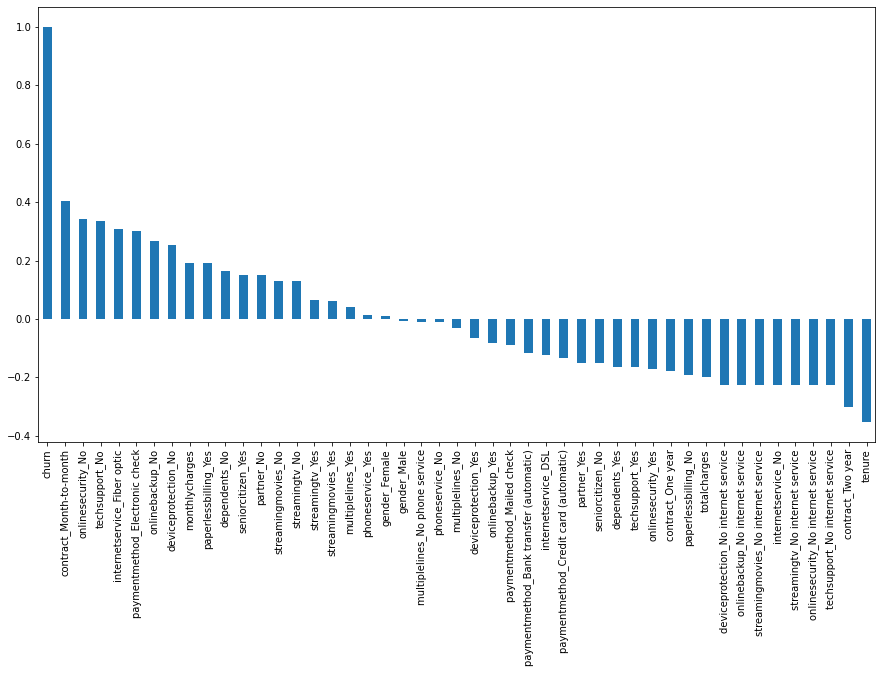

In [16]:
# Check the correlation of churn with other attributes
plt.figure(figsize=(15,8))
one_hotted.corr()['churn'].sort_values(ascending = False).plot(kind='bar')

##### Based on the above graph, month to month contract, without online security and tech support are positively correlated with churn. While tenure, two year contracts are negatively correlated with churn.
##### Active streaming tv and movies subscriptions are expected positively correlated with churn but the result shown is vice versa.

# Data Exploration

### Demographics

Text(0.5, 1.0, 'Gender Distribution')

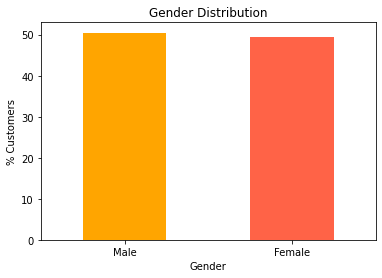

In [17]:
colors = ['#FFA500','#FF6347']
ax = (df['gender'].value_counts()*100.0 /len(df)).plot(kind='bar',stacked = True,rot = 0,color = colors)

ax.set_ylabel('% Customers')
ax.set_xlabel('Gender')
ax.set_ylabel('% Customers')
ax.set_title('Gender Distribution')

##### The gender is almost equally distributed. Male and Female contribute around 50% each to the dataset

Text(0.5, 1.0, '% of Senior Citizen')

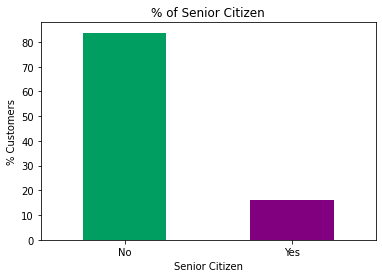

In [18]:
colors = ['#009E60','#800080']
ax = (df['seniorcitizen'].value_counts()*100.0 /len(df)).plot(kind='bar',stacked = True,rot = 0,color = colors)

ax.set_ylabel('% Customers')
ax.set_xlabel('Senior Citizen')
ax.set_ylabel('% Customers')
ax.set_title('% of Senior Citizen')

##### Most of the customer in the dataset is not senior citizen (around 80%)

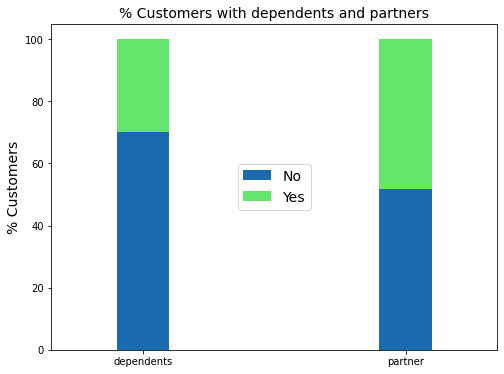

In [19]:
df2 = pd.melt(telco, id_vars=['customerid'], value_vars=['dependents','partner'])
df3 = df2.groupby(['variable','value']).count().unstack()
df3 = df3*100/len(df)
colors = ['#1a6ab0','#63e66b']
ax = df3.loc[:,'customerid'].plot.bar(stacked=True, color=colors,
                                      figsize=(8,6),rot = 0,
                                     width = 0.2)

ax.set_ylabel('% Customers',size = 14)
ax.set_xlabel('')
ax.set_title('% Customers with dependents and partners',size = 14)
ax.legend(loc = 'center',prop={'size':14})

##### Around 50% of the customers have a partner, and around 30% of th customers have dependents

## Customer Account Information

c:\users\septe\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, '# of Customers by their tenure')

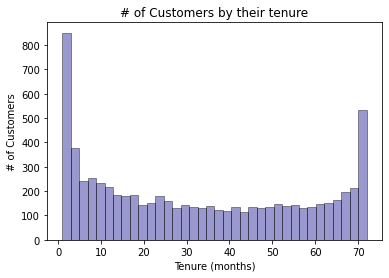

In [20]:
import seaborn as sns
ax = sns.distplot(df['tenure'], hist=True, kde=False, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('# of Customers by their tenure')

#### Most of the customers have been with the telecom company just a month, while quite many been there for about 70 months

Text(0.5, 1.0, '# of Customers by Contract Type')

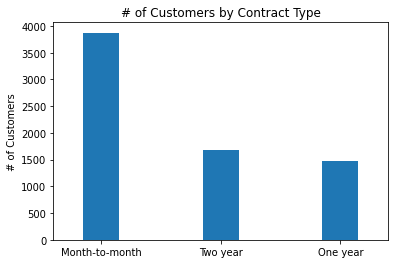

In [21]:
ax = df['contract'].value_counts().plot(kind = 'bar',rot = 0, width = 0.3)
ax.set_ylabel('# of Customers')
ax.set_title('# of Customers by Contract Type')

##### Most of the customers are having month-to-month contract with the telecom company. Two year and one year contract shared almost the same % of customers.

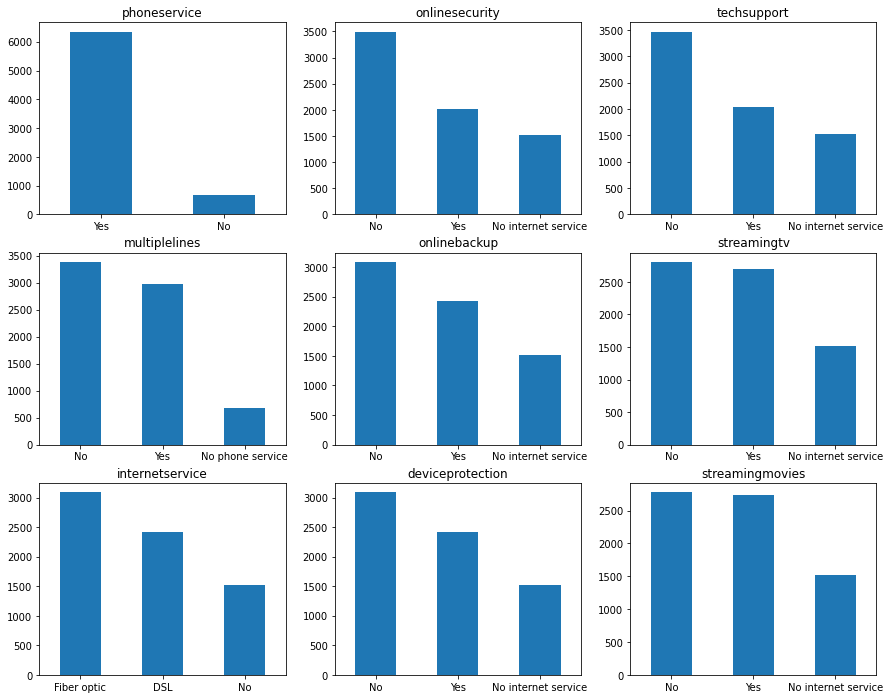

In [22]:
services = ['phoneservice','multiplelines','internetservice','onlinesecurity',
           'onlinebackup','deviceprotection','techsupport','streamingtv','streamingmovies']

fig, axes = plt.subplots(nrows = 3,ncols = 3,figsize = (15,12))
for i, item in enumerate(services):
    if i < 3:
        ax = df[item].value_counts().plot(kind = 'bar',ax=axes[i,0],rot = 0)
        
    elif i >=3 and i < 6:
        ax = df[item].value_counts().plot(kind = 'bar',ax=axes[i-3,1],rot = 0)
        
    elif i < 9:
        ax = df[item].value_counts().plot(kind = 'bar',ax=axes[i-6,2],rot = 0)
    ax.set_title(item)

# Modelling

### Models: Logistic Regression, Random Forest, SVM

In [23]:
# Independent variables
X = one_hotted.drop(columns = ['churn'])

# Dependent variable
y = one_hotted['churn']


In [24]:
# Split Train & Test Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [25]:
# Running logistic regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
result = model.fit(X_train, y_train)

# Prediction
prediction_test = model.predict(X_test)

# Prediction accuracy
print('Logistic Regression:', metrics.accuracy_score(y_test, prediction_test))



Logistic Regression: 0.8075829383886256


In [26]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
model_rf = RandomForestClassifier(n_estimators=1000 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)

model_rf.fit(X_train.values, y_train.values)

# Prediction
prediction_test = model_rf.predict(X_test.values)

# Prediction accuracy
print('Random Forest:',metrics.accuracy_score(y_test, prediction_test))

Random Forest: 0.8081023454157783


In [27]:
from sklearn.svm import SVC

model.svm = SVC(kernel='linear') 
model.svm.fit(X_train,y_train)

# Prediction
preds = model.svm.predict(X_test)

# Prediction accuracy
print('SVM: ',metrics.accuracy_score(y_test, preds))

SVM:  0.8073916133617626


### In conclusion, the 3 models we used have around 80% accuracy which is quite promising

### Logistic Regression > Random Forest > SVM